# Using LLMs as High-Level Planners for Multi-Agent Coordination

This notebook provides a step-by-step guide to customizing and interacting with the RL environment.

## For Submission
1. Fill in your code in `submit.py`. 
   - Add your code *only* in the TODO sections marked by the '#' delimiter lines. Do not modify any other parts of the script.
   - You should implement any helper functions/classes in a separate `helper.py` file and import them in `submit.py`.
1. Submit `out.log` and `results.csv` generated by the `submit.py` script.


In [1]:
# Import necessary libraries and modules
import gymnasium as gym
import multigrid.envs
import matplotlib.pyplot as plt
from agents import AgentCollection

%matplotlib inline
%load_ext autoreload
%autoreload 2

---
## Environment
- $N$ × $N$ square grid, where 50 ≤ $N$ ≤ 100.
  - The boundary cells are walls and hence the effective movement area will be ($N$ - 1) x ($N$ - 1).
- $M$ agents, where 2 ≤ $M$ ≤ 5, are placed at the same initial position at coordionate (1, 1).
- $T$ hidden targets are randomly placed in the grid.
- At the start of each episode, the environment provides a mission description, indicating regions (bounding box) where the targets are likely to be found.
  - e.g., “The region from (0, 0) to (5, 5) contains 5 targets. The region from (5, 5) to (10, 10) contains 5 targets.”

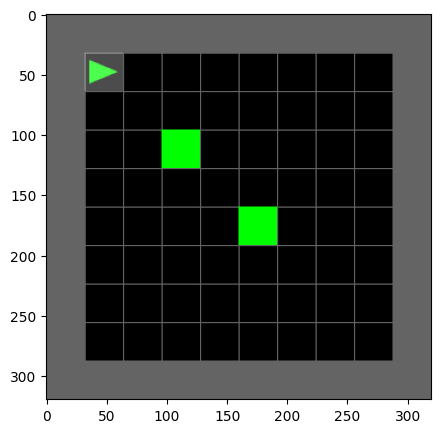

In [2]:
# # Use a predefined environment
# env = gym.make('MultiGrid-EmptyEnvV2-hidden-20x20-v0', agents=2, render_mode='rgb_array')

# Customize the environment
env = multigrid.envs.EmptyEnvV2(
    size=10,  # Specify the size of the grid, N
    agents=2,  # Specify number of agents, M
    goals=[(3, 3), (5, 5)],  # Specify target positions for agents
    mission_space="All targets are contained within the region from (3, 3) to (5, 5).",
    render_mode="rgb_array",
    hidden_goals=True,
    # max_steps=50, # For debugging, you can set a maximum number of steps
)

# Always reset the environment before starting
observations, infos = env.reset()

# Render the environment
img = env.render()
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.show()

---
## Initial Plan Generation

An intial plan can be generated by the `initial_planner` by invoking it with the grid size and number of agents available.

In [4]:
from planner import initial_planner

{0: <ActionUpDown.right: 1>, 1: <ActionUpDown.right: 1>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


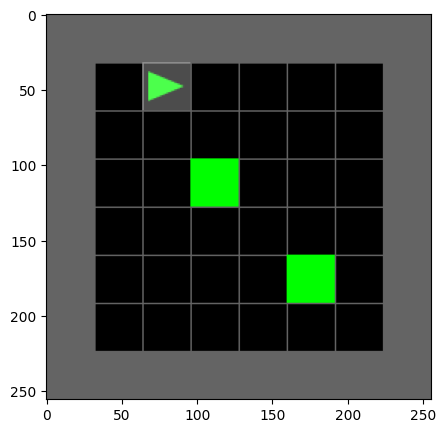

{0: <ActionUpDown.left: 0>, 1: <ActionUpDown.right: 1>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


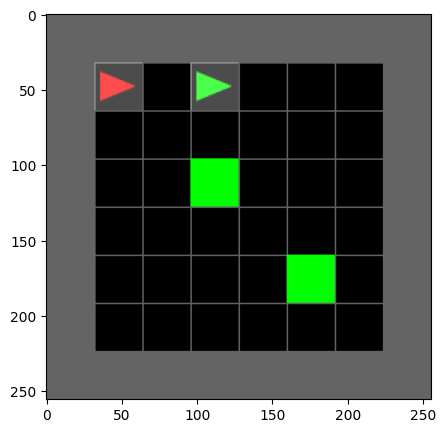

{0: <ActionUpDown.right: 1>, 1: <ActionUpDown.right: 1>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


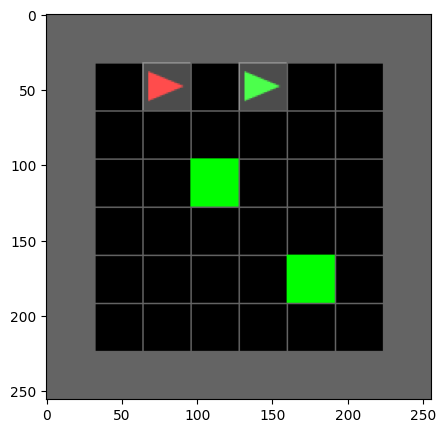

{0: <ActionUpDown.right: 1>, 1: <ActionUpDown.right: 1>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


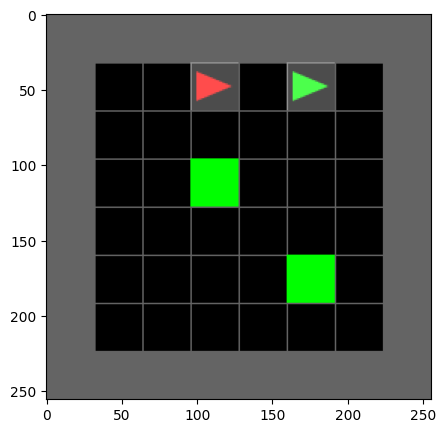

{0: <ActionUpDown.right: 1>, 1: <ActionUpDown.right: 1>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


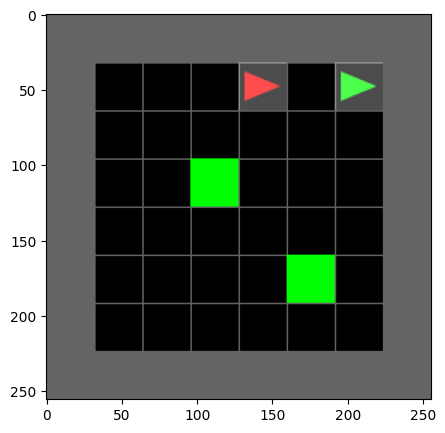

{0: <ActionUpDown.down: 3>, 1: <ActionUpDown.left: 0>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


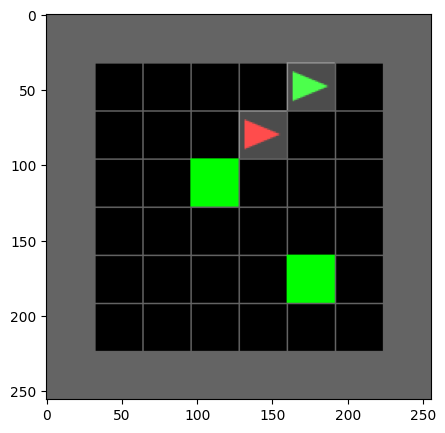

{0: <ActionUpDown.left: 0>, 1: <ActionUpDown.right: 1>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


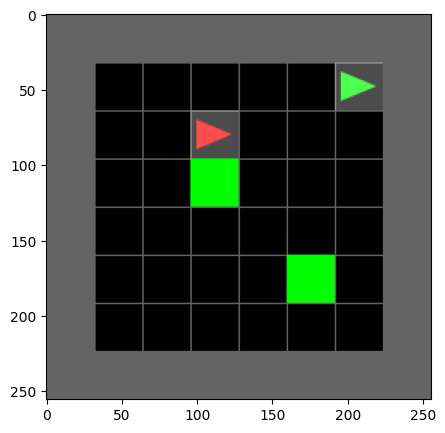

{0: <ActionUpDown.left: 0>, 1: <ActionUpDown.right: 1>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


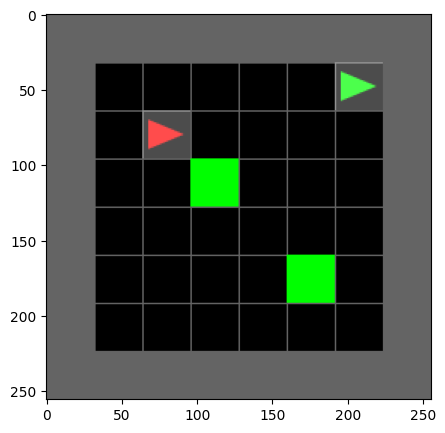

{0: <ActionUpDown.left: 0>, 1: <ActionUpDown.right: 1>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


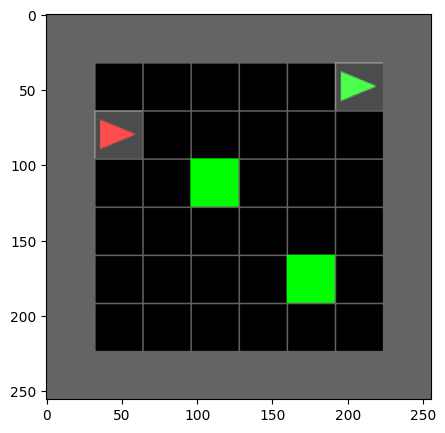

{0: <ActionUpDown.down: 3>, 1: <ActionUpDown.down: 3>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


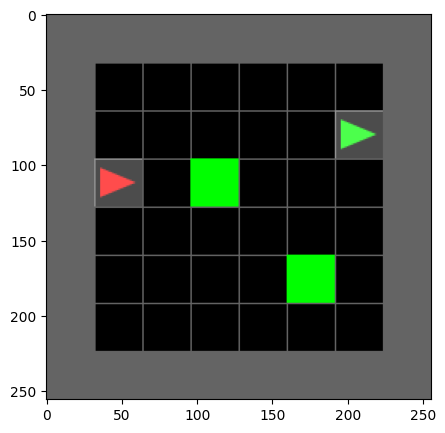

{0: <ActionUpDown.right: 1>, 1: <ActionUpDown.left: 0>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


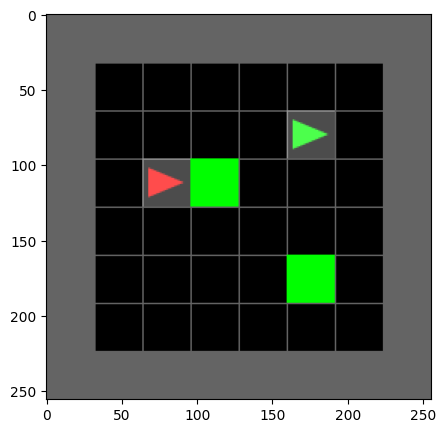

{0: <ActionUpDown.right: 1>, 1: <ActionUpDown.left: 0>} {0: 1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


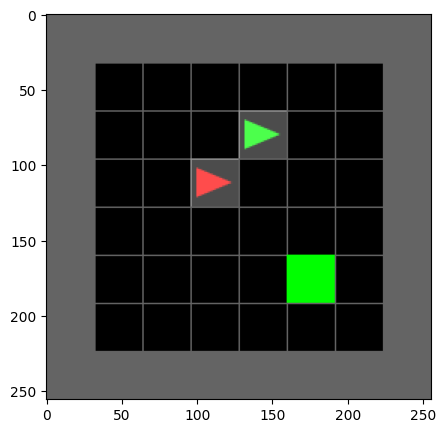

{0: <ActionUpDown.right: 1>, 1: <ActionUpDown.left: 0>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


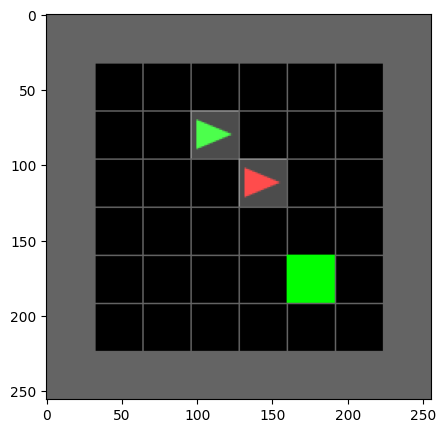

{0: <ActionUpDown.down: 3>, 1: <ActionUpDown.down: 3>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


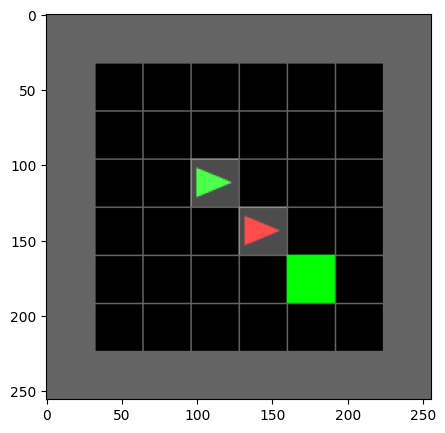

{0: <ActionUpDown.left: 0>, 1: <ActionUpDown.right: 1>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


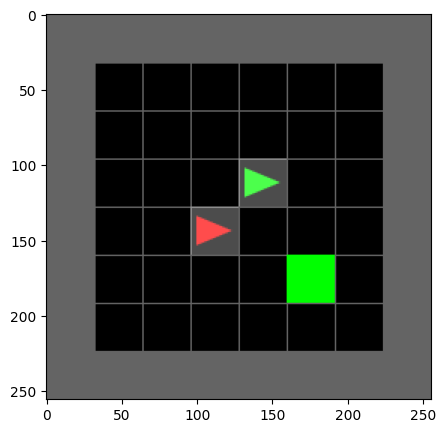

{0: <ActionUpDown.left: 0>, 1: <ActionUpDown.right: 1>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


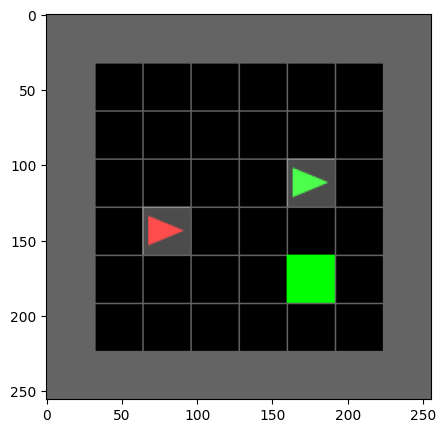

{0: <ActionUpDown.left: 0>, 1: <ActionUpDown.right: 1>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


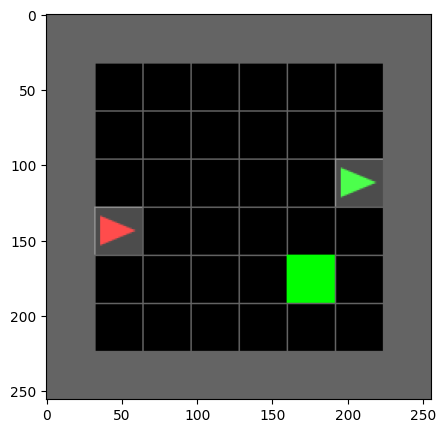

{0: <ActionUpDown.down: 3>, 1: <ActionUpDown.down: 3>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


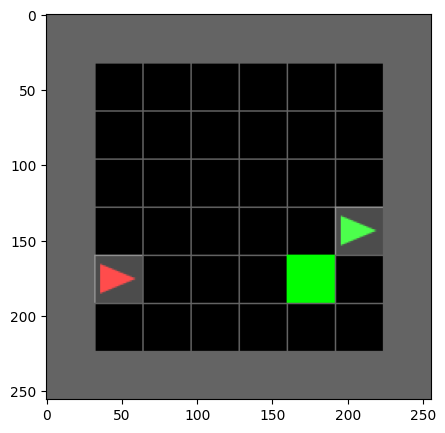

{0: <ActionUpDown.down: 3>, 1: <ActionUpDown.left: 0>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


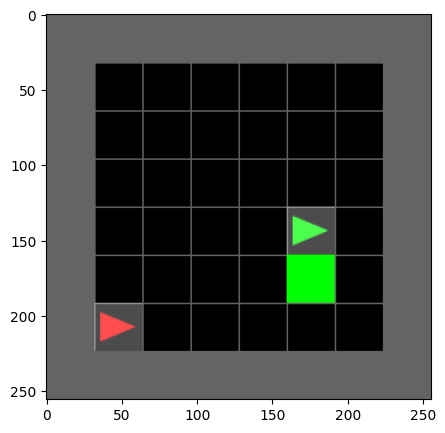

{0: <ActionUpDown.down: 3>, 1: <ActionUpDown.left: 0>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


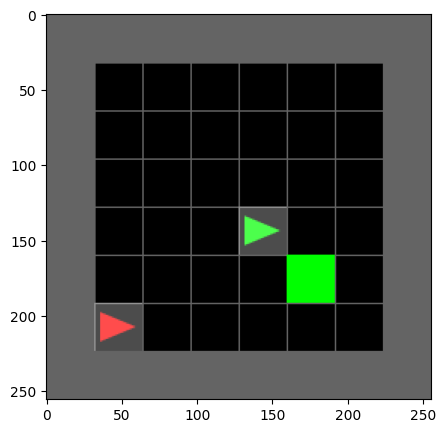

{0: <ActionUpDown.down: 3>, 1: <ActionUpDown.left: 0>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


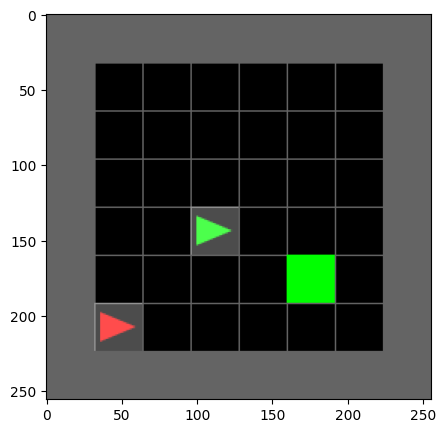

{0: <ActionUpDown.left: 0>, 1: <ActionUpDown.down: 3>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


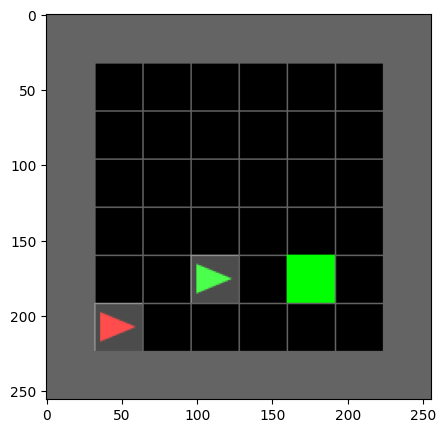

{0: <ActionUpDown.right: 1>, 1: <ActionUpDown.down: 3>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


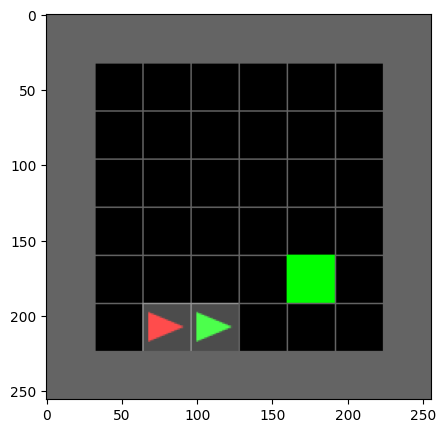

{0: <ActionUpDown.right: 1>, 1: <ActionUpDown.down: 3>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


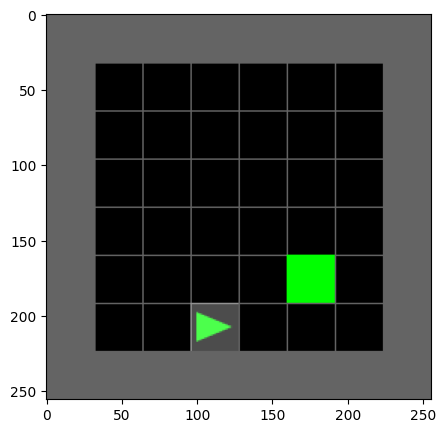

{0: <ActionUpDown.right: 1>, 1: <ActionUpDown.down: 3>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


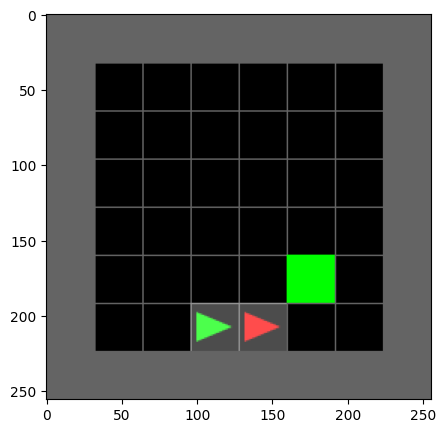

{0: <ActionUpDown.down: 3>, 1: <ActionUpDown.left: 0>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


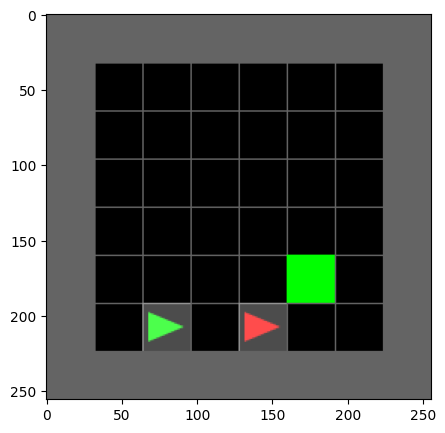

{0: <ActionUpDown.left: 0>, 1: <ActionUpDown.right: 1>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


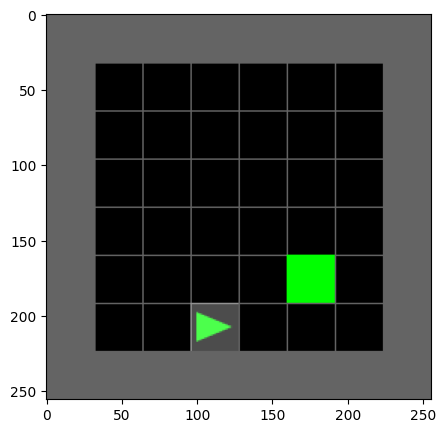

{0: <ActionUpDown.left: 0>, 1: <ActionUpDown.right: 1>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


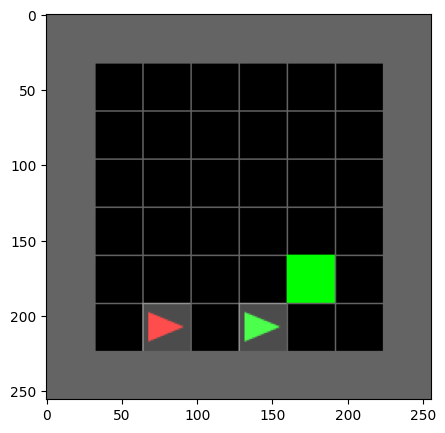

{0: <ActionUpDown.left: 0>, 1: <ActionUpDown.right: 1>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


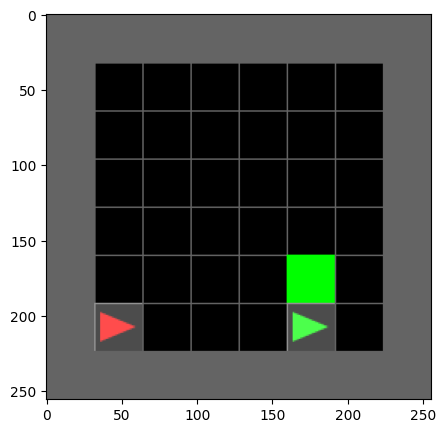

{0: <ActionUpDown.down: 3>, 1: <ActionUpDown.down: 3>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


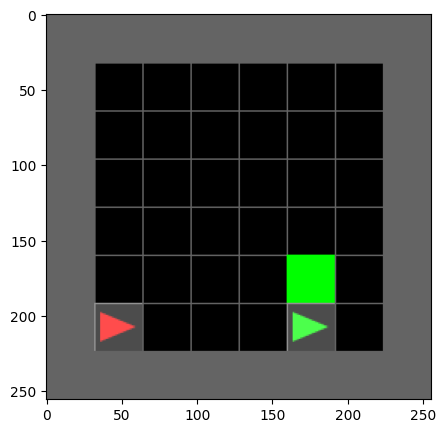

{0: <ActionUpDown.right: 1>, 1: <ActionUpDown.left: 0>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


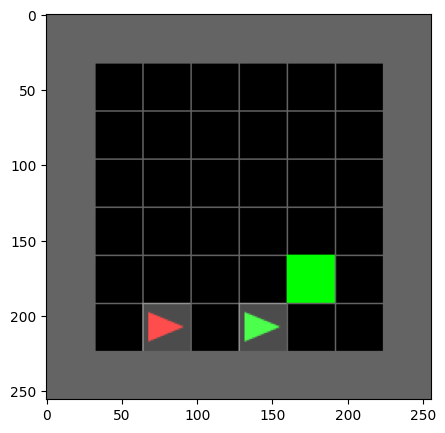

{0: <ActionUpDown.right: 1>, 1: <ActionUpDown.left: 0>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


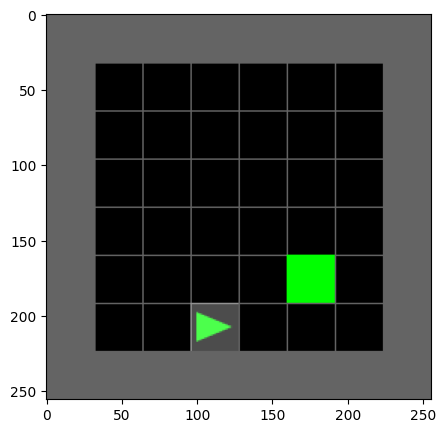

{0: <ActionUpDown.right: 1>, 1: <ActionUpDown.left: 0>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


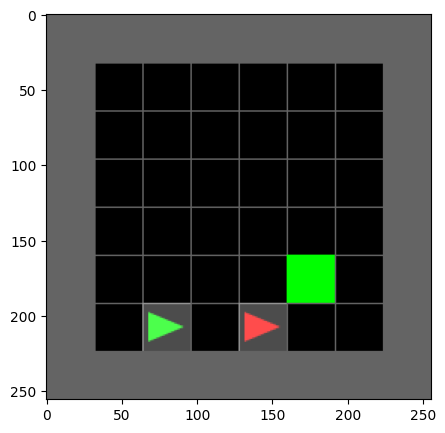

{0: <ActionUpDown.down: 3>, 1: <ActionUpDown.down: 3>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


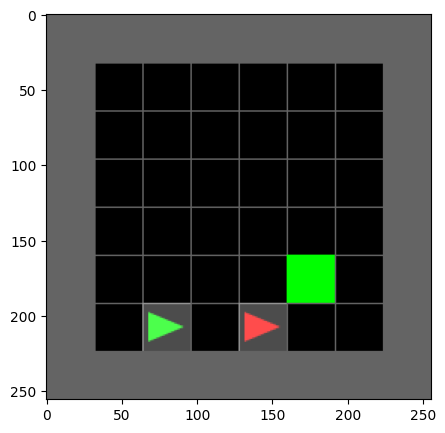

{0: <ActionUpDown.left: 0>, 1: <ActionUpDown.right: 1>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


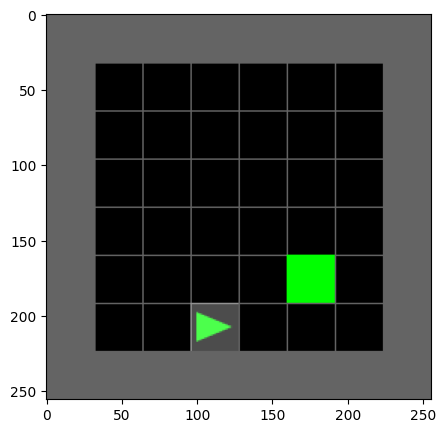

{0: <ActionUpDown.left: 0>, 1: <ActionUpDown.right: 1>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


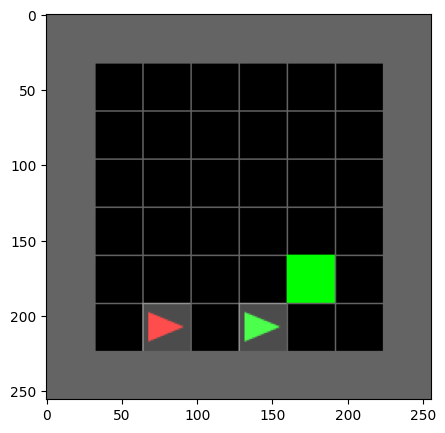

{0: <ActionUpDown.left: 0>, 1: <ActionUpDown.right: 1>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


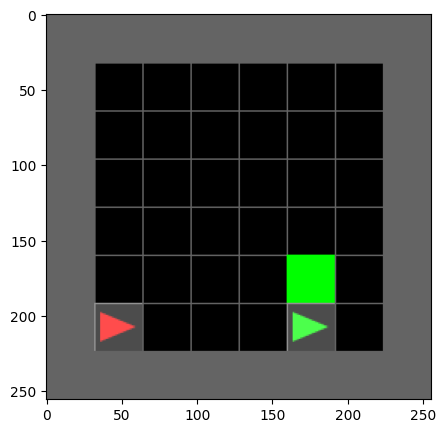

{0: <ActionUpDown.done: 7>, 1: <ActionUpDown.down: 3>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


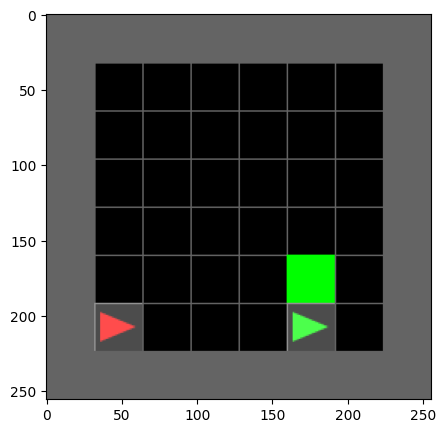

{0: <ActionUpDown.done: 7>, 1: <ActionUpDown.left: 0>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


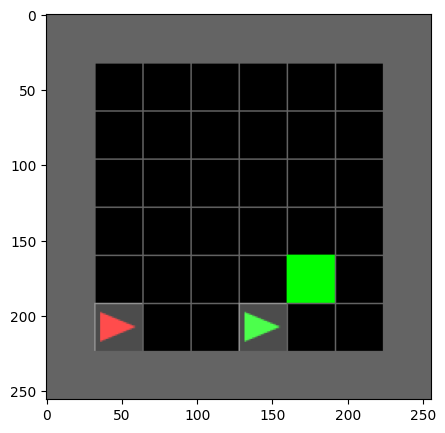

{0: <ActionUpDown.done: 7>, 1: <ActionUpDown.left: 0>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


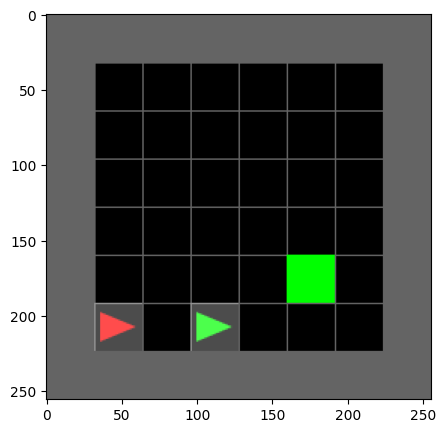

{0: <ActionUpDown.done: 7>, 1: <ActionUpDown.left: 0>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


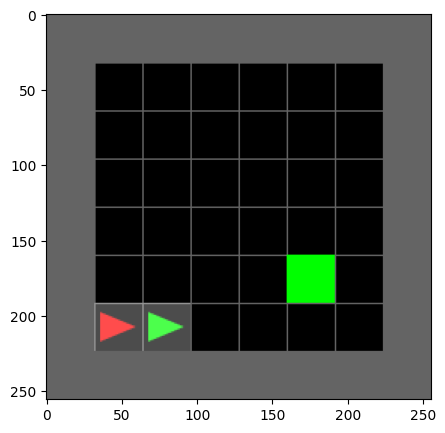

In [6]:
N, M = 8, 2
env = multigrid.envs.EmptyEnvV2(
    size=N,  # Specify the size of the grid, N
    agents=M,  # Specify number of agents, M
    goals=[(3, 3), (5, 5)],  # Specify target positions for agents
    mission_space="All targets are contained within the region from (3, 3) to (5, 5).",
    render_mode="rgb_array",
    hidden_goals=True,
    # max_steps=50, # For debugging, you can set a maximum number of steps
)

# Always reset the environment before starting
observations, infos = env.reset()

# Create a group of 2 agents
agents = AgentCollection(num=2)

# Providing the agents with high-level instructions
plan = initial_planner.invoke({"grid_length": N, "num_agents": M})
for agent, actions in plan.agents.items():
    for action in actions:
        agents.tell({agent: action.serialize()})

while not agents.all_idle() and not env.unwrapped.is_done():
    # Obtain the low-level action for current time step for all agents
    a = agents.act()

    # Step the environment with the actions
    observations, rewards, terminations, truncations, infos = env.step(a)
    print(a, rewards, terminations, truncations)

    # Render the environment
    img = env.render()
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.show()

env.close()

---
## Advance Usage
We can chain high-level actions (Example 1) and also dynamically replans (Example 2 and Example 3).

{0: <ActionUpDown.right: 1>, 1: <ActionUpDown.right: 1>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


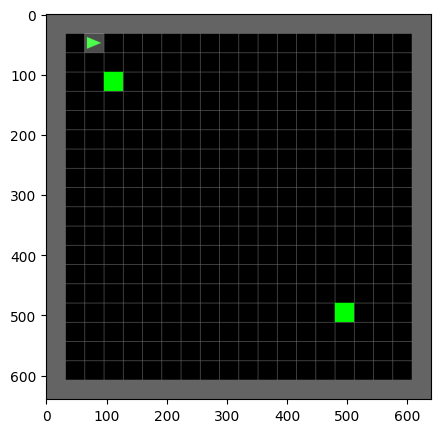

{0: <ActionUpDown.right: 1>, 1: <ActionUpDown.right: 1>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


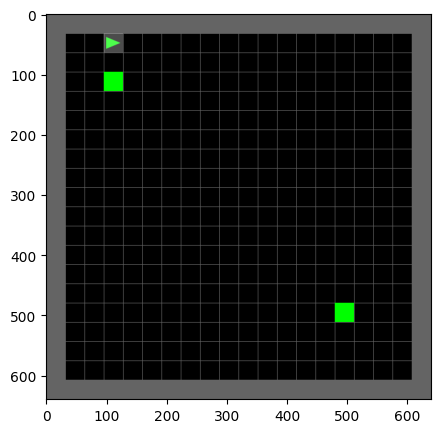

{0: <ActionUpDown.right: 1>, 1: <ActionUpDown.right: 1>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


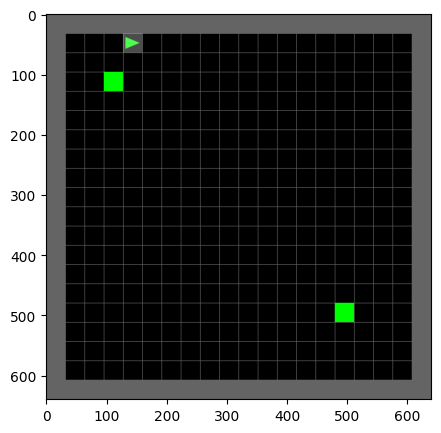

{0: <ActionUpDown.right: 1>, 1: <ActionUpDown.right: 1>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


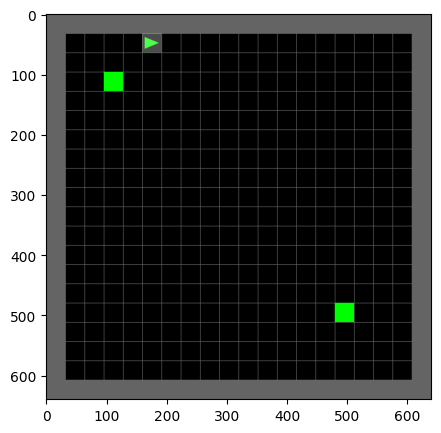

{0: <ActionUpDown.down: 3>, 1: <ActionUpDown.right: 1>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


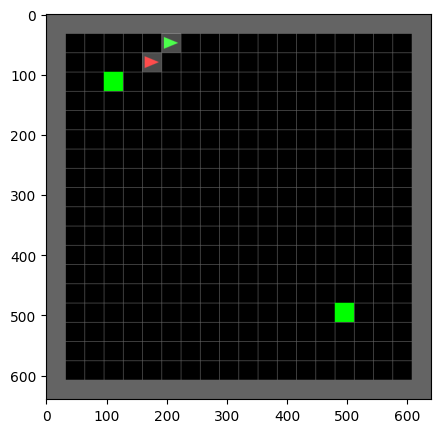

{0: <ActionUpDown.left: 0>, 1: <ActionUpDown.right: 1>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


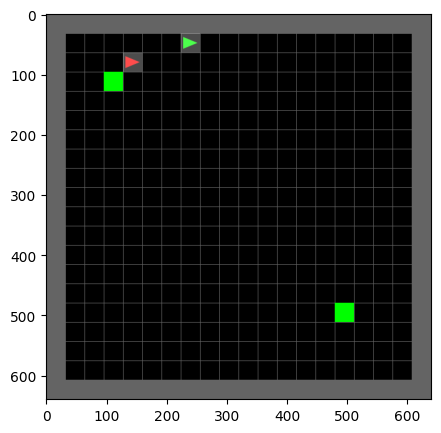

{0: <ActionUpDown.left: 0>, 1: <ActionUpDown.right: 1>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


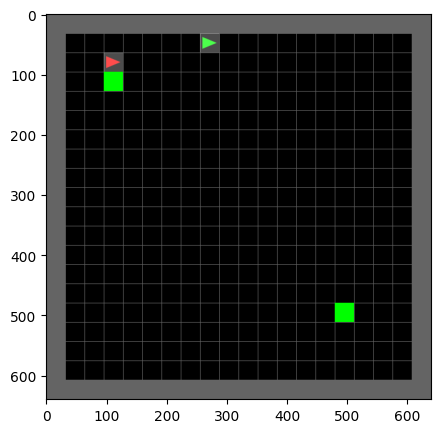

{0: <ActionUpDown.left: 0>, 1: <ActionUpDown.right: 1>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


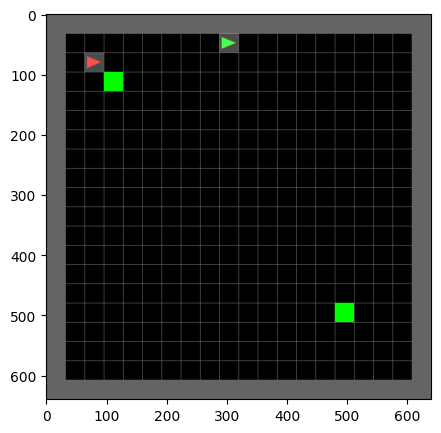

{0: <ActionUpDown.left: 0>, 1: <ActionUpDown.right: 1>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


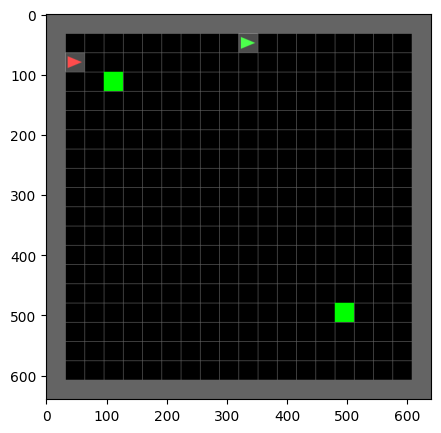

{0: <ActionUpDown.down: 3>, 1: <ActionUpDown.down: 3>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


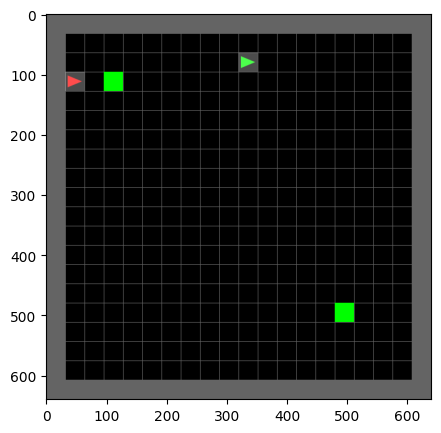

{0: <ActionUpDown.right: 1>, 1: <ActionUpDown.down: 3>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


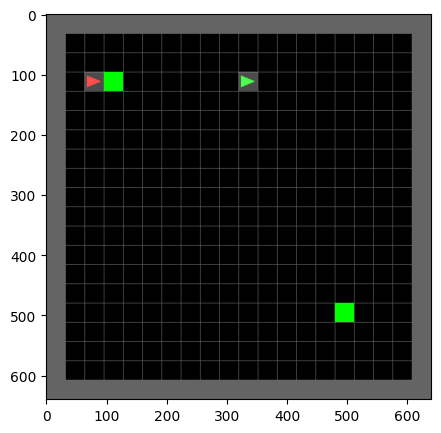

{0: <ActionUpDown.right: 1>, 1: <ActionUpDown.down: 3>} {0: 1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


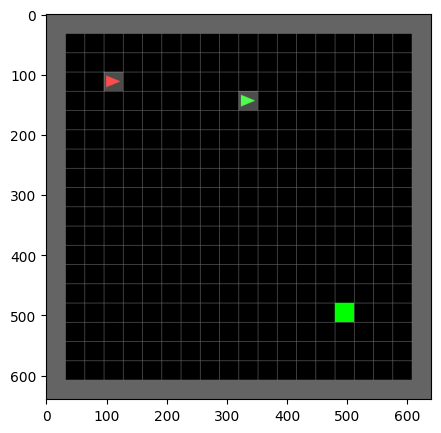

{0: <ActionUpDown.right: 1>, 1: <ActionUpDown.down: 3>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


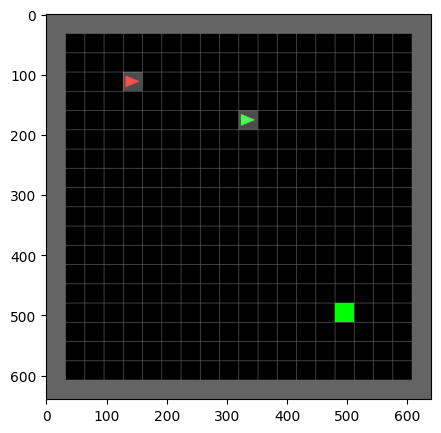

{0: <ActionUpDown.right: 1>, 1: <ActionUpDown.down: 3>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


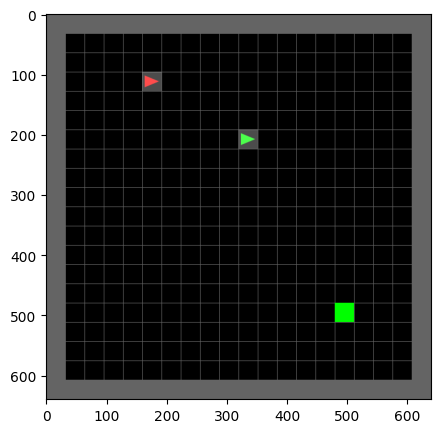

{0: <ActionUpDown.right: 1>, 1: <ActionUpDown.down: 3>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


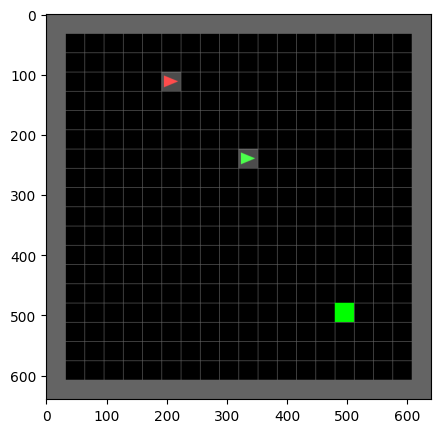

{0: <ActionUpDown.right: 1>, 1: <ActionUpDown.down: 3>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


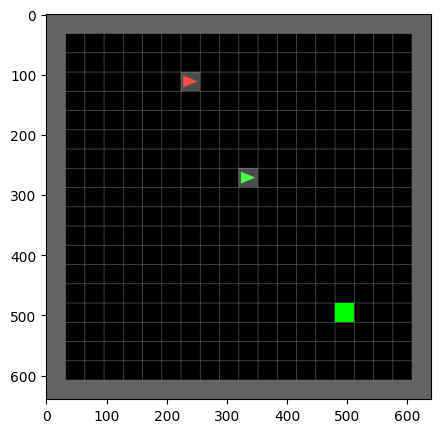

{0: <ActionUpDown.right: 1>, 1: <ActionUpDown.down: 3>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


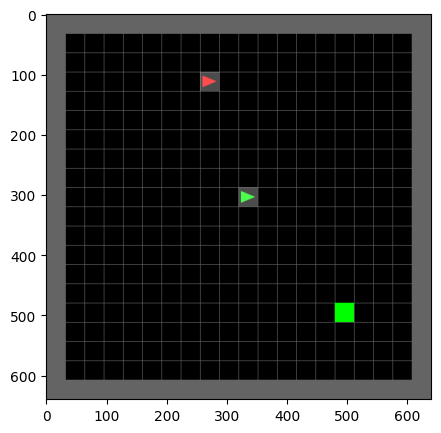

{0: <ActionUpDown.right: 1>, 1: <ActionUpDown.down: 3>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


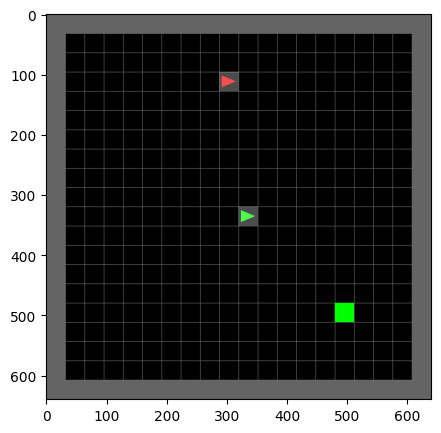

{0: <ActionUpDown.right: 1>, 1: <ActionUpDown.right: 1>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


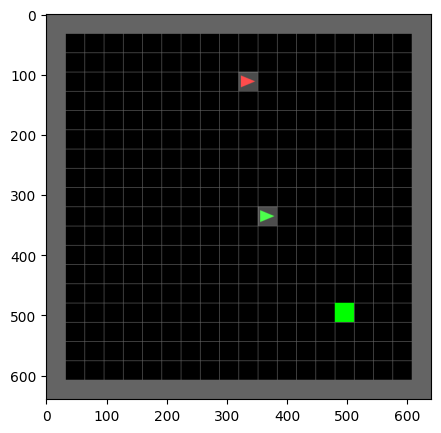

{0: <ActionUpDown.right: 1>, 1: <ActionUpDown.right: 1>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


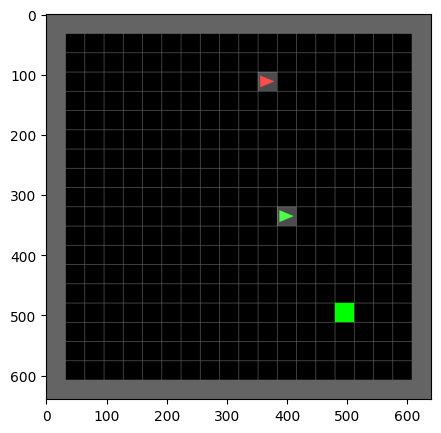

{0: <ActionUpDown.right: 1>, 1: <ActionUpDown.right: 1>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


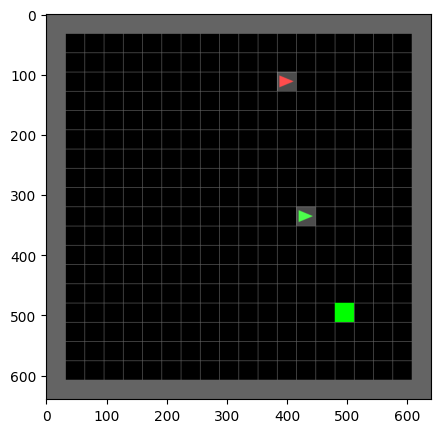

{0: <ActionUpDown.right: 1>, 1: <ActionUpDown.down: 3>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


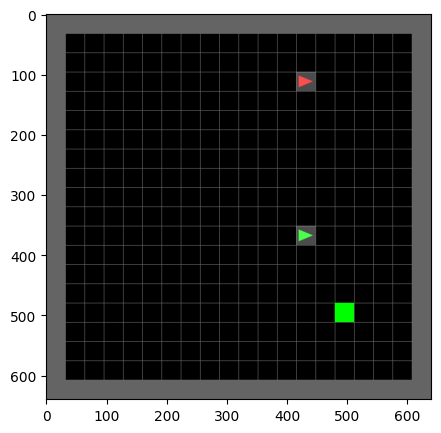

{0: <ActionUpDown.right: 1>, 1: <ActionUpDown.left: 0>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


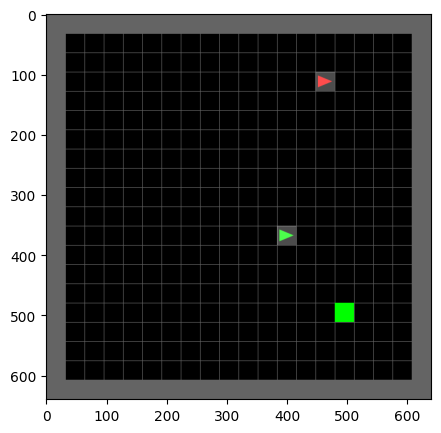

{0: <ActionUpDown.down: 3>, 1: <ActionUpDown.left: 0>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


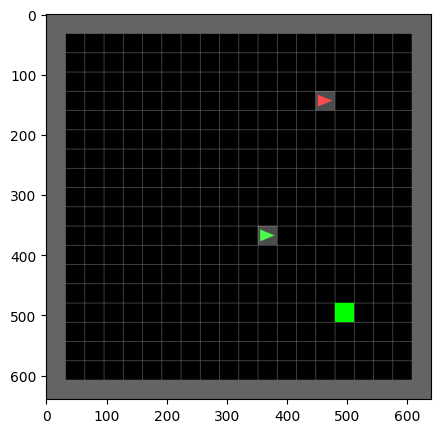

{0: <ActionUpDown.down: 3>, 1: <ActionUpDown.left: 0>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


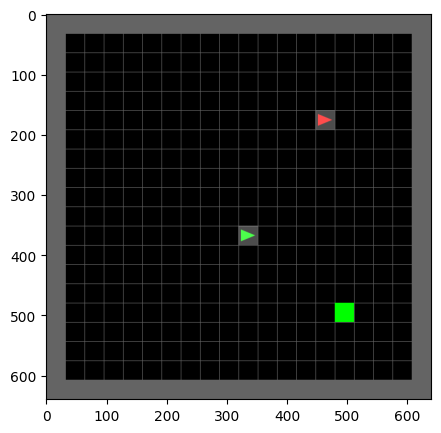

{0: <ActionUpDown.down: 3>, 1: <ActionUpDown.down: 3>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


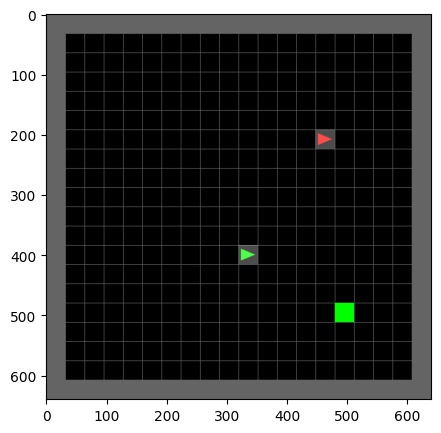

{0: <ActionUpDown.down: 3>, 1: <ActionUpDown.right: 1>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


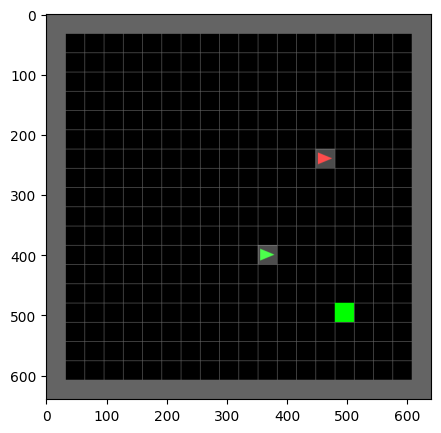

{0: <ActionUpDown.down: 3>, 1: <ActionUpDown.right: 1>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


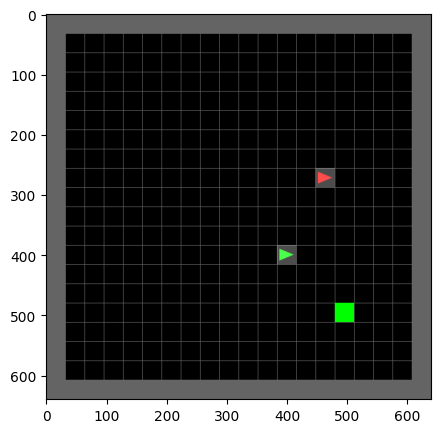

{0: <ActionUpDown.down: 3>, 1: <ActionUpDown.right: 1>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


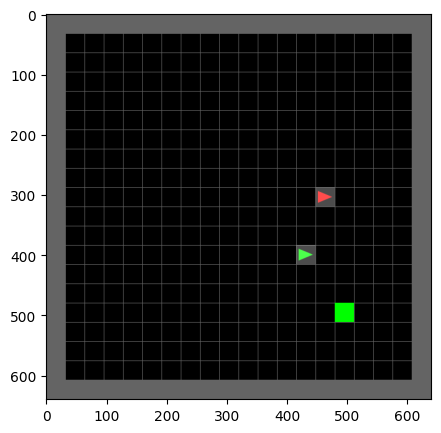

{0: <ActionUpDown.down: 3>, 1: <ActionUpDown.down: 3>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


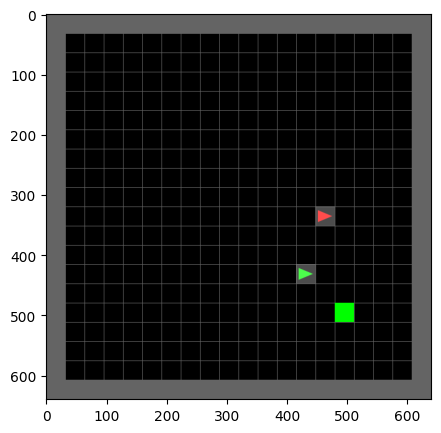

{0: <ActionUpDown.right: 1>, 1: <ActionUpDown.left: 0>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


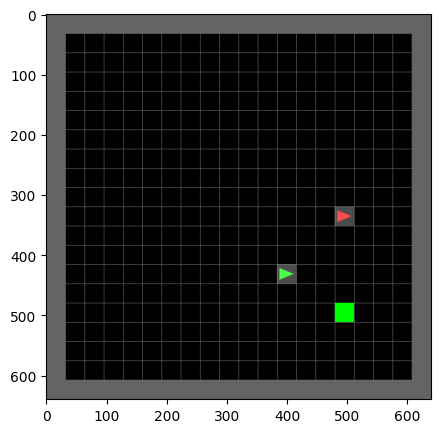

{0: <ActionUpDown.right: 1>, 1: <ActionUpDown.left: 0>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


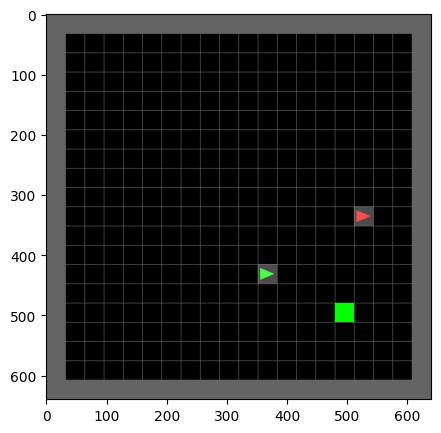

{0: <ActionUpDown.down: 3>, 1: <ActionUpDown.left: 0>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


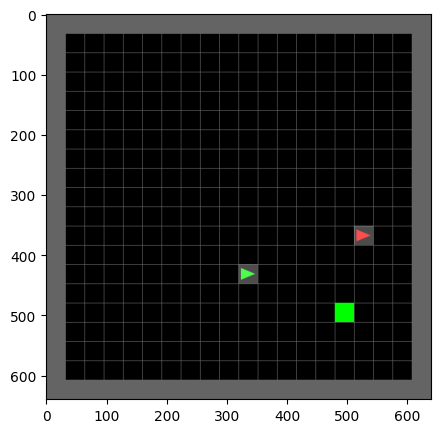

{0: <ActionUpDown.left: 0>, 1: <ActionUpDown.down: 3>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


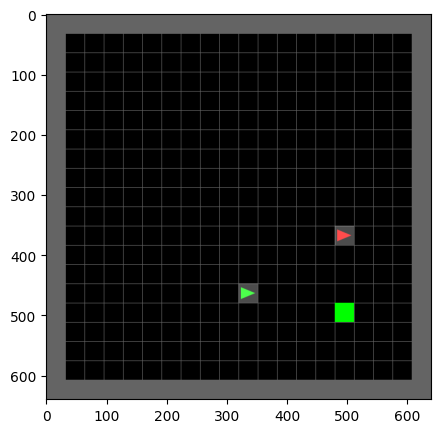

{0: <ActionUpDown.left: 0>, 1: <ActionUpDown.right: 1>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


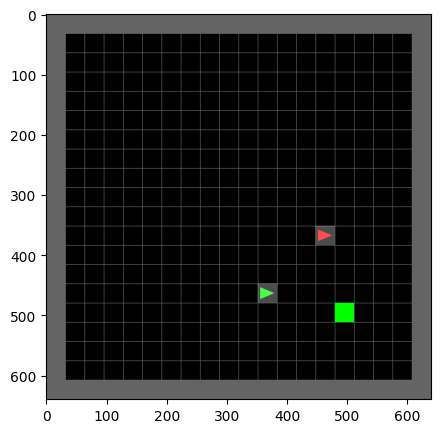

{0: <ActionUpDown.down: 3>, 1: <ActionUpDown.right: 1>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


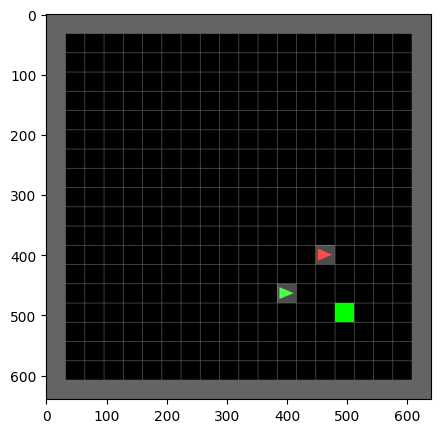

{0: <ActionUpDown.right: 1>, 1: <ActionUpDown.right: 1>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


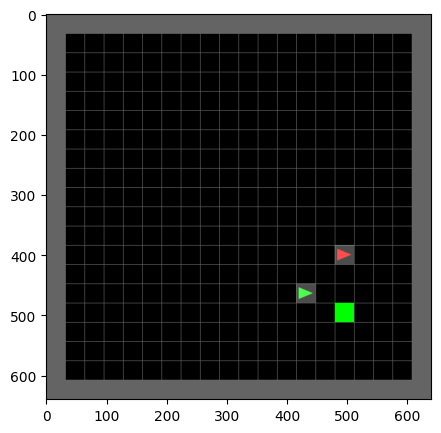

{0: <ActionUpDown.right: 1>, 1: <ActionUpDown.down: 3>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


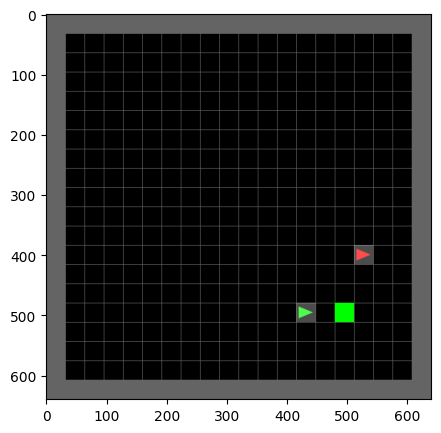

{0: <ActionUpDown.down: 3>, 1: <ActionUpDown.left: 0>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


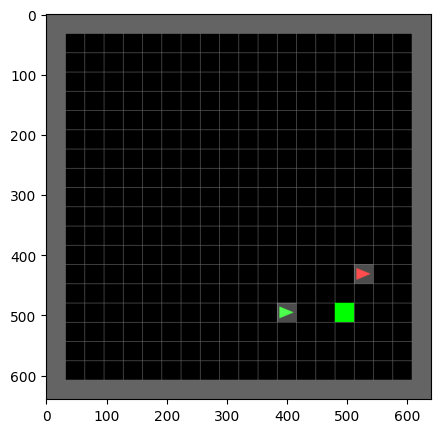

{0: <ActionUpDown.left: 0>, 1: <ActionUpDown.left: 0>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


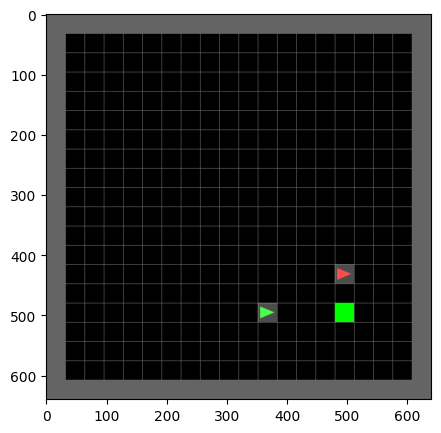

{0: <ActionUpDown.left: 0>, 1: <ActionUpDown.left: 0>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


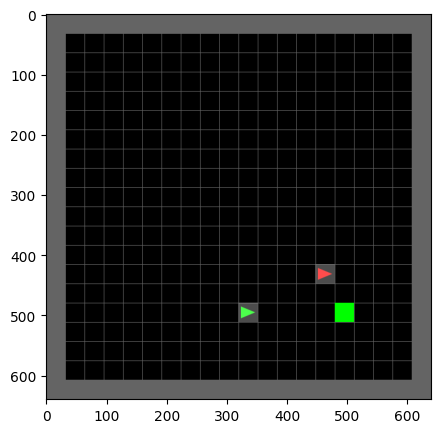

{0: <ActionUpDown.down: 3>, 1: <ActionUpDown.done: 7>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


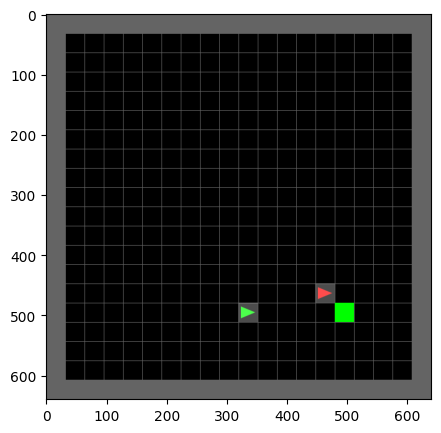

{0: <ActionUpDown.right: 1>, 1: <ActionUpDown.done: 7>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


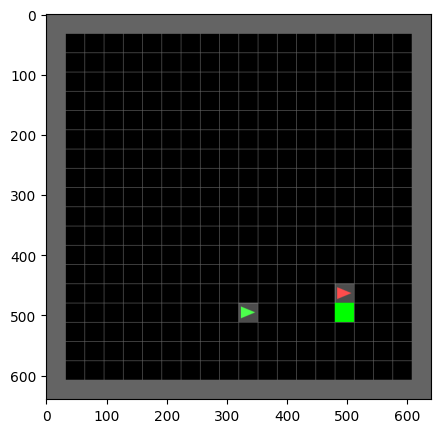

{0: <ActionUpDown.right: 1>, 1: <ActionUpDown.done: 7>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


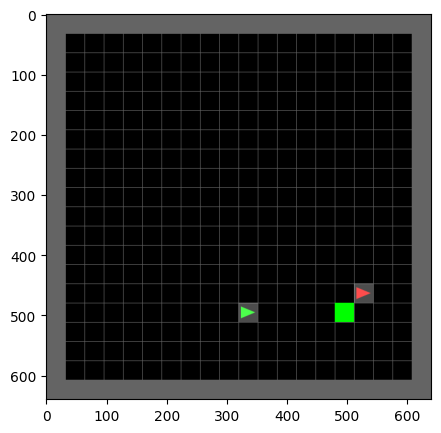

{0: <ActionUpDown.down: 3>, 1: <ActionUpDown.done: 7>} {0: -1, 1: -1} {0: np.False_, 1: np.False_} {0: False, 1: False}


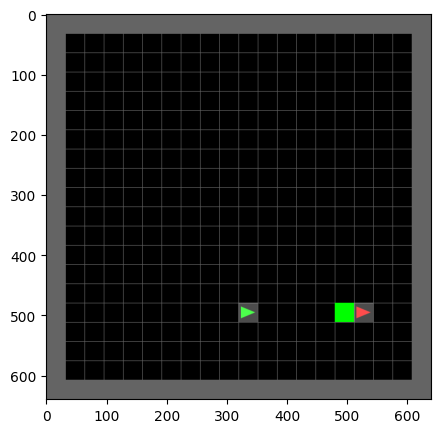

{0: <ActionUpDown.left: 0>, 1: <ActionUpDown.done: 7>} {0: 1, 1: -1} {0: np.True_, 1: np.True_} {0: False, 1: False}


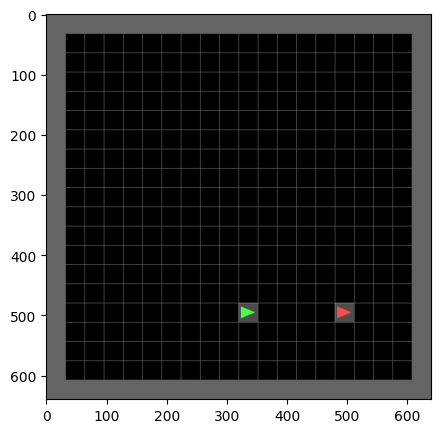

In [ ]:
env = multigrid.envs.EmptyEnvV2(
    size=20,  # Specify the size of the grid, N
    agents=2,  # Specify number of agents, M
    goals=[(3, 3), (15, 15)],  # Specify target positions for agents
    mission_space="One target is contained within the region from (1, 1) to (5, 5) and the other target is contained within the region from (10, 10) to (16, 16).",
    render_mode="rgb_array",
    hidden_goals=True,
)

# Always reset the environment before starting
observations, infos = env.reset()

# Create a group of 2 agents
agents = AgentCollection(num=2)

# Providing the agents with high-level instructions.
# Again, these instructions should be generated by your LLM and not hardcoded.
agents.tell(
    {
        0: "search(1, 1, 1, 1, 5, 5)",
        1: "move(1, 1, 10, 10)",
    }
)

# Example 1: Chaining high-level actions for Agent 1
agents.tell(
    {
        1: "search(10, 10, 10, 10, 13, 15)",
    }
)
while not env.unwrapped.is_done():
    # Obtain the low-level action for current time step for all agents
    a = agents.act()

    # Step the environment with the actions
    observations, rewards, terminations, truncations, infos = env.step(a)
    print(a, rewards, terminations, truncations)

    # Render the environment
    img = env.render()
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.show()

    # Example 2: Replan after finding a target.
    for i in agents.agents:
        if rewards[i] > 0:  # Agent i has found a target
            # Stop Agent i if it has found a target
            agents.tell({i: "stop()"})
            # Replan Agent i to search for the second target
            cur_x, cur_y = observations[i]["location"]
            agents.tell({i: f"search({cur_x}, {cur_y}, 14, 10, 16, 16)"})

    # Example 3: Replan when all agents are idle
    if agents.all_idle():
        print("All agents are idle.")
        # Consider to do something here, e.g., replan with LLM
        break
env.close()

---
# Resources

[Introduction to RL - OpenAI](https://spinningup.openai.com/en/latest/spinningup/rl_intro.html)